In [1]:
import pandas as pd
import numpy as np

In [17]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTkOVD1EmQnBUA1XyEQdGbSamOhqy6gqKjJwpOe56gfQ0Oy63j5PHDd-Vgzymo8J_hgUg7YHNva3TN_/pub?output=xlsx"
df = pd.read_excel(url)

In [18]:
content = df

In [19]:
!pip install apyori


In [20]:
records = []
for i in range (0,15):
    records.append([str(content.values[i,j]) for j in range (0,7)])

In [21]:
from apyori import apriori

In [22]:
associations = apriori(records, min_length = 2, min_support = 0.09, min_confidence = 0.2, min_lift = 2)

In [23]:
associations = list(associations)

In [24]:
print(len(associations))

31


In [25]:
print(associations[0])

RelationRecord(items=frozenset({'0.85', '10 COLOUR SPACEBOY PEN'}), support=0.2, ordered_statistics=[OrderedStatistic(items_base=frozenset({'0.85'}), items_add=frozenset({'10 COLOUR SPACEBOY PEN'}), confidence=1.0, lift=5.0), OrderedStatistic(items_base=frozenset({'10 COLOUR SPACEBOY PEN'}), items_add=frozenset({'0.85'}), confidence=1.0, lift=5.0)])


In [26]:
print(associations[21])

RelationRecord(items=frozenset({'CREAM CUPID HEARTS COAT HANGER', '84406B'}), support=0.13333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'84406B'}), items_add=frozenset({'CREAM CUPID HEARTS COAT HANGER'}), confidence=1.0, lift=7.5), OrderedStatistic(items_base=frozenset({'CREAM CUPID HEARTS COAT HANGER'}), items_add=frozenset({'84406B'}), confidence=1.0, lift=7.5)])


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline


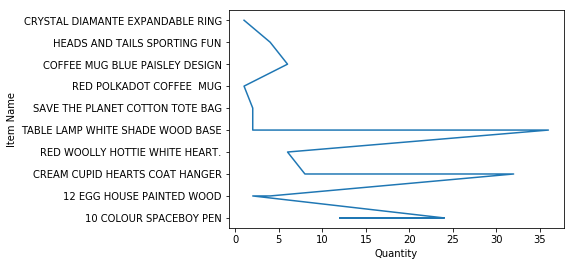

In [28]:
plt.plot(content.Quantity, content.Description)
plt.xlabel("Quantity")
plt.ylabel("Item Name")
plt.show()

Text(0.5, 0, 'Item Name')

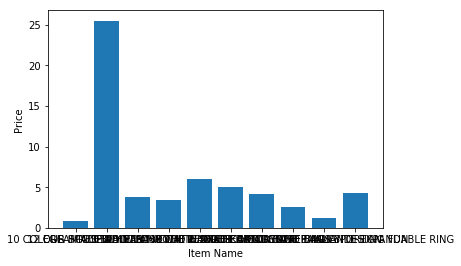

In [29]:
plt.bar(content.Description, content.UnitPrice)
plt.ylabel("Price")
plt.xlabel("Item Name")

Text(0, 0.5, 'Country')

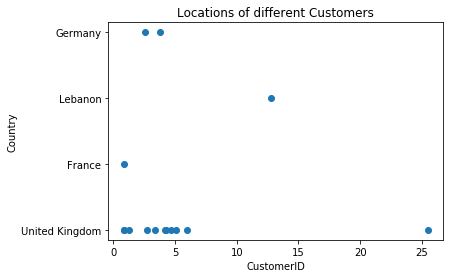

In [30]:

y = content["Country"]
x = content["UnitPrice"]
plt.scatter(x,y)
plt.title("Locations of different Customers")
plt.xlabel("CustomerID")
plt.ylabel("Country")

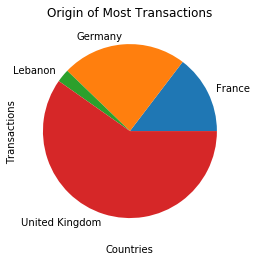

In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
df1 = content.groupby('Country',axis=0).sum()
df1["Quantity"].plot(kind='pie')
plt.title("Origin of Most Transactions")
plt.xlabel("Countries")
plt.ylabel("Transactions")
plt.show()

Text(0, 0.5, 'Unit Price')

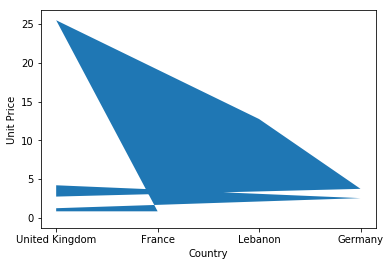

In [32]:
plt.stackplot(content.Country, content.UnitPrice)
plt.xlabel("Country")
plt.ylabel("Unit Price")